In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
dtrain = pd.read_csv('/content/drive/MyDrive/train_data.txt', sep=":::")
dtest = pd.read_csv('/content/drive/MyDrive/test_data.txt', sep=":::")
dtrain.columns = ['Sno' ,'movie_Name' ,'Genre','Synopsis']
dtest.columns = ['Sno' ,'Name' ,'Synopsis']
dtest.head()

<ipython-input-2-607744d20988>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dtrain = pd.read_csv('/content/drive/MyDrive/train_data.txt', sep=":::")
<ipython-input-2-607744d20988>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dtest = pd.read_csv('/content/drive/MyDrive/test_data.txt', sep=":::")


,Sno,Name,Synopsis
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [3]:
dtrain.head()

,Sno,movie_Name,Genre,Synopsis
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [4]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sno       54199 non-null  int64 
 1   Name      54199 non-null  object
 2   Synopsis  54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         54213 non-null  int64 
 1   movie_Name  54213 non-null  object
 2   Genre       54213 non-null  object
 3   Synopsis    54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
dc = dtrain.value_counts()
dc.index

MultiIndex([(    2,                                  ' Cupid (1997) ', ...),
            (36162,                  ' A Disconnected Rhythm (2014) ', ...),
            (36138,                             ' Adult Prom (????) ', ...),
            (36139,                ' Arai Enn 305-il Kadavul (2008) ', ...),
            (36140,                    ' Heroes and Villains (2005) ', ...),
            (36141,                           ' Check for Me (2012) ', ...),
            (36142,                ' Korea: We Called It War (2002) ', ...),
            (36143,                            ' Ironwalkers (2018) ', ...),
            (36144,                    ' "NewNowNext PopLab" (2008) ', ...),
            (36145,                            ' A Holy Week (2016) ', ...),
            ...
            (18071,                          ' Finding Diane (2008) ', ...),
            (18072,                      ' Enter the Sandman (2006) ', ...),
            (18073,                                      ' T

In [7]:
dc = dtrain.Genre.value_counts()
dc
dc.index

Index([' drama ', ' documentary ', ' comedy ', ' short ', ' horror ',
       ' thriller ', ' action ', ' western ', ' reality-tv ', ' family ',
       ' adventure ', ' music ', ' romance ', ' sci-fi ', ' adult ', ' crime ',
       ' animation ', ' sport ', ' talk-show ', ' fantasy ', ' mystery ',
       ' musical ', ' biography ', ' history ', ' game-show ', ' news ',
       ' war '],
      dtype='object', name='Genre')

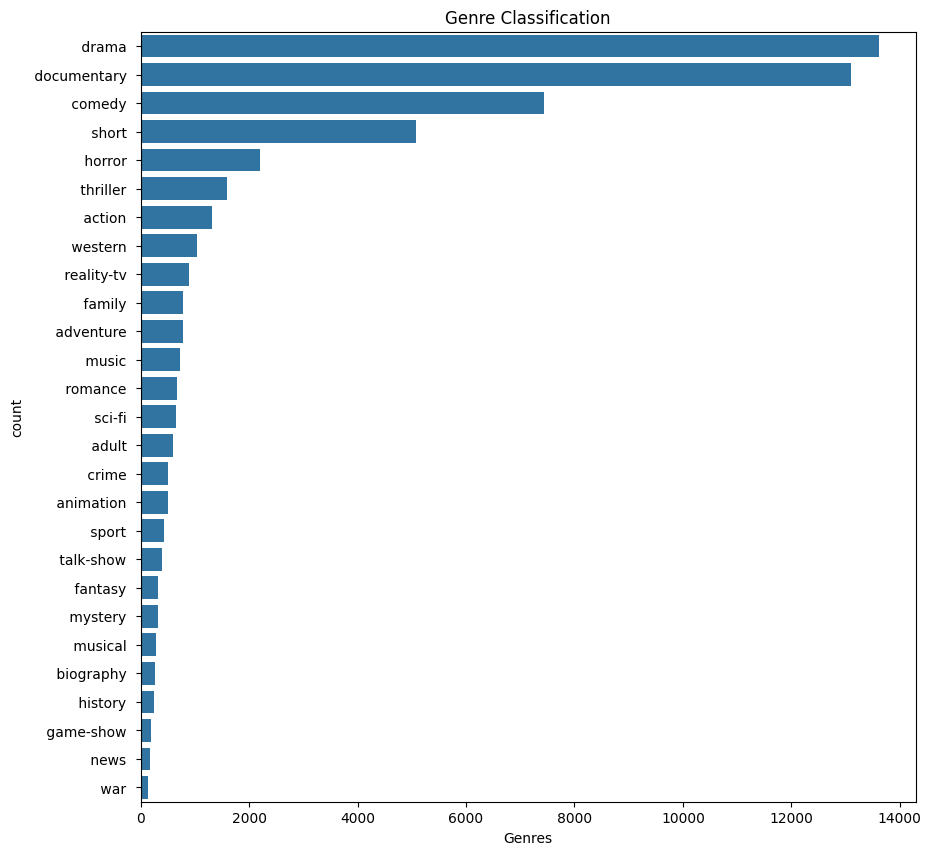

In [3]:
import seaborn as sns
dc = dtrain.Genre.value_counts()
plt.figure(figsize = (10,10))
sns.barplot(x=dc,y=dc.index, orient = 'h')
plt.xlabel("Genres")
plt.ylabel("count")
plt.title("Genre Classification")
plt.show()

In [4]:
dfy1 = dtrain.iloc[:,[2]].values
dfy1 = pd.DataFrame(dfy1)
dfy2 = pd.read_csv('/content/drive/MyDrive/test_data_solution.txt',sep=":::",engine='python')
dfy2.columns = ['Sno','Name','Genre','Synopsis']
dfy2 = dfy2.iloc[:,[2]].values
dfy2 = pd.DataFrame(dfy2)
y = pd.concat([dfy1,dfy2],ignore_index=True)
y

,0
0,thriller
1,adult
2,drama
3,drama
4,documentary
...,...
108407,horror
108408,western
108409,adult
108410,drama


In [5]:
idfx1 = dtrain.iloc[:,[3]].values
idfx1 = pd.DataFrame(idfx1)

In [6]:
idfx2 = dtest.iloc[:,[2]].values
idfx2 = pd.DataFrame(idfx2)
x = pd.concat([idfx2,idfx1],ignore_index=True)
x

,0
0,"Spain, March 1964: Quico is a very naughty ch..."
1,One year in the life of Albin and his family ...
2,"His father has died, he hasn't spoken with hi..."
3,Before he was known internationally as a mart...
4,Emily Burns is being held captive in a room w...
...,...
108407,This short-lived NBC live sitcom centered on ...
108408,The NEXT Generation of EXPLOITATION. The sist...
108409,"Ze bestaan echt, is a stand-up comedy about g..."
108410,Walter and Vivian live in the country and hav...


In [7]:
encode = LabelEncoder()
y[0] = encode.fit_transform(y[0].values)
y = y.iloc[:,[0]].values
y = pd.DataFrame(y)
y

,0
0,24
1,1
2,8
3,8
4,7
...,...
108407,13
108408,26
108409,1
108410,8


In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5002, random_state=42)

In [16]:
tf = TfidfVectorizer()
xtrain= tf.fit_transform(xtrain[0])
xtest = tf.transform(xtest[0])

In [31]:
cls = LogisticRegression()
cls.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
preds = cls.predict(xtest)

In [36]:
classifier = MultinomialNB()
classifier.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [18]:
xtrain.shape

(54184, 121150)

In [19]:
xtest.shape

(54228, 121150)

In [39]:
y_pred = classifier.predict(xtest)
y_pred[:6]

array([8, 7, 7, 7, 8, 7])

In [52]:
print(f"Accuracy of NB: {accuracy_score(ytest,y_pred)*100}")

Accuracy of NB: 24.996311868407464


In [49]:
print(f"Accuarcy of Logistic Regression: {accuracy_score(ytest,preds)*100}")

Accuarcy of Logistic Regression: 23.805045364018586


In [53]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1261
           1       0.00      0.00      0.00       603
           2       0.00      0.00      0.00       753
           3       0.00      0.00      0.00       485
           4       0.00      0.00      0.00       267
           5       0.17      0.00      0.00      7410
           6       0.00      0.00      0.00       523
           7       0.24      0.34      0.28     13059
           8       0.25      0.67      0.37     13720
           9       0.00      0.00      0.00       767
          10       0.00      0.00      0.00       331
          11       0.00      0.00      0.00       204
          12       0.00      0.00      0.00       260
          13       0.00      0.00      0.00      2218
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       270
          16       0.00      0.00      0.00       305
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
cm = confusion_matrix(ytest,y_pred)
print(cm)

[[   1    1    0    0    0   33    0  561  643    2    0    0    0    1
     0    0    0    0    2    2    0   11    0    1    3    0    0]
 [   1    0    0    0    0   11    0  278  304    0    0    0    0    0
     0    0    0    0    0    0    0    5    0    0    4    0    0]
 [   2    1    0    0    0   20    0  305  410    1    1    0    0    2
     0    0    2    0    1    0    0    6    0    1    1    0    0]
 [   1    1    1    1    0    9    0  225  241    1    0    1    0    1
     1    0    0    0    0    0    0    1    0    0    0    0    1]
 [   0    0    1    0    0    5    0  113  144    0    0    0    0    3
     0    0    0    0    0    0    0    1    0    0    0    0    0]
 [   6    6    8    0    1  155    2 3259 3863   14    4    0    1   15
     2    1    1    0    4    1    1   38    1    1   19    0    7]
 [   2    0    0    0    0   14    0  216  279    0    0    0    0    3
     0    0    1    1    0    0    0    6    0    1    0    0    0]
 [  18   17   11    

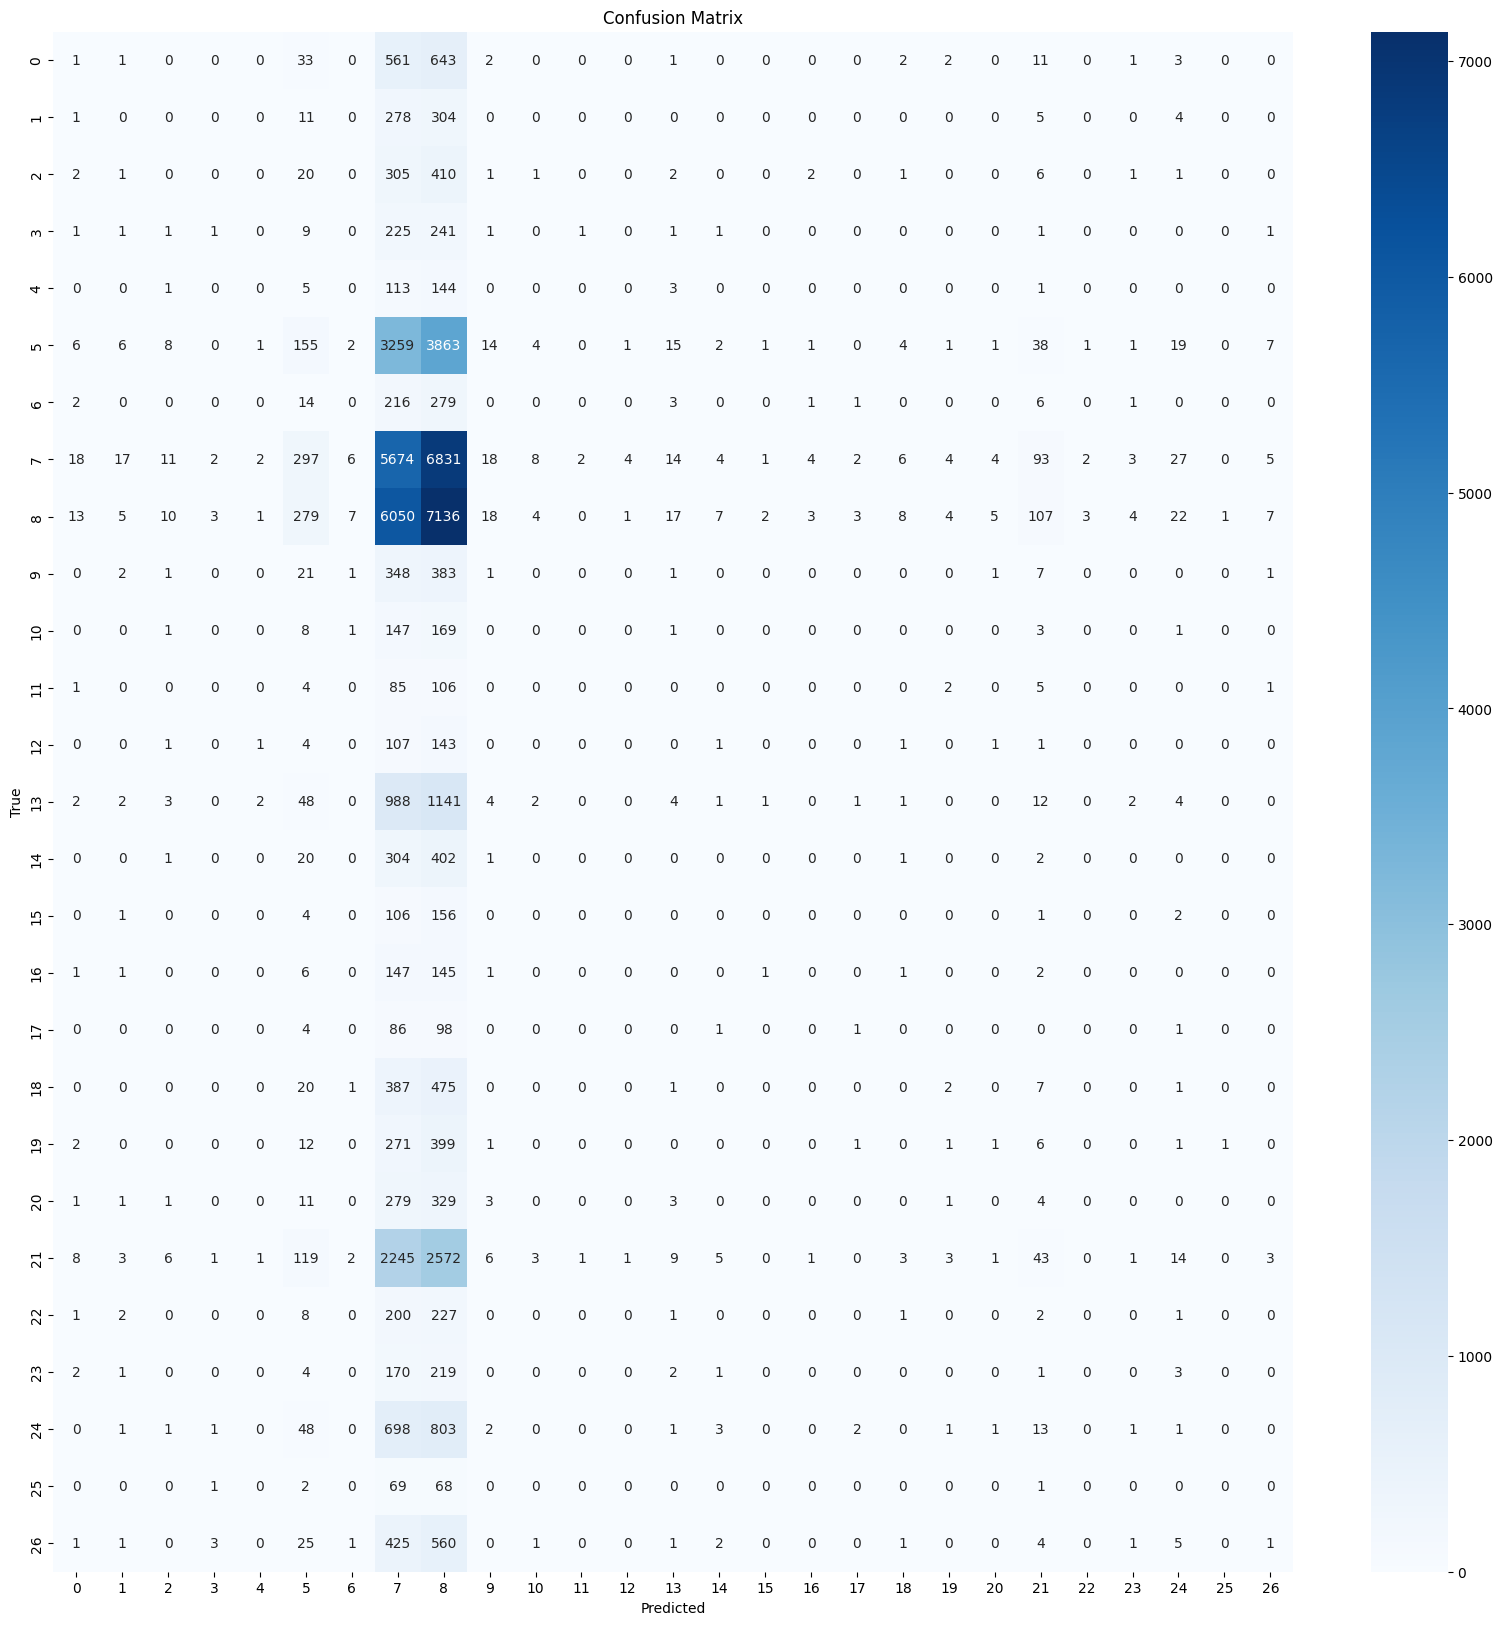

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()